In [133]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import scipy as sp

data = sp.genfromtxt('web_traffic.tsv', delimiter='\t')

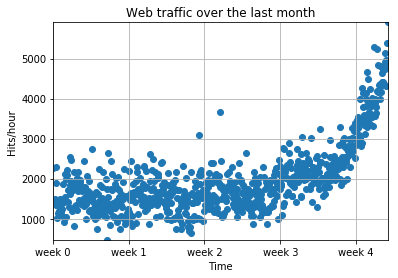

In [134]:
x = data[:,0]
y = data[:,1]

x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]

def build_plot():
    plt.scatter(x,y)
    plt.title('Web traffic over the last month')
    plt.xlabel('Time')
    plt.ylabel('Hits/hour')
    plt.xticks(
        [w*7*24 for w in range(10)],
        ['week %i' % w for w in range(10)]
    )
    plt.autoscale(tight=True)
    plt.grid()
build_plot()
plt.show()

In [135]:
def error(f,x,y):
    return sp.sum((f(x) - y) ** 2)

fp1, residuals, rank, sv, rcond = sp.polyfit(x,y,1,full=True)
print("Model parameters: %s" % fp1)
print(residuals)

f1 = sp.poly1d(fp1)
print(error(f1, x, y))

Model parameters: [   2.59619213  989.02487106]
[  3.17389767e+08]
317389767.34


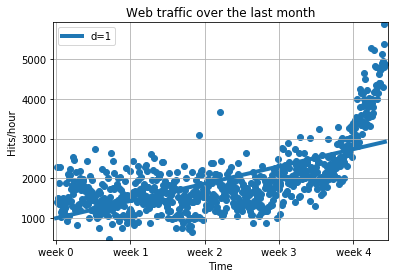

In [136]:
fx = sp.linspace(0, x[-1], 1000)
plt.plot(fx, f1(fx), linewidth=4)
plt.legend(['d=%i' % f1.order], loc='upper left')
build_plot()
plt.show()

In [137]:
f2p = sp.polyfit(x,y,2)
f2 = sp.poly1d(f2p)
print(error(f2, x, y))

179983507.878


In [138]:
f3p = sp.polyfit(x,y,3)
f3 = sp.poly1d(f3p)
print(error(f3, x, y))

139350144.032


In [139]:
f10p = sp.polyfit(x,y,10)
f10 = sp.poly1d(f10p)
print(error(f10, x, y))

121942326.364


In [140]:
f100p = sp.polyfit(x,y,100)
f100 = sp.poly1d(f100p)
print(error(f100, x, y))

109452405.614


/home/cybran/.virtualenvs/machine_learning/lib/python3.6/site-packages/numpy/lib/polynomial.py:583: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/cybran/.virtualenvs/machine_learning/lib/python3.6/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


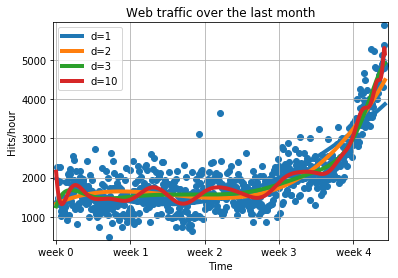

In [141]:
plt.plot(fx, f2(fx), linewidth=4)
plt.plot(fx, f3(fx), linewidth=4)
plt.plot(fx, f10(fx), linewidth=4)
plt.plot(fx, f100(fx), linewidth=4)
plt.legend([
    'd=%i' % f1.order,
    'd=%i' % f2.order,
    'd=%i' % f3.order,
    'd=%i' % f10.order,
    'd=%i' % f100.order,
], loc='upper left')
build_plot()
plt.show()

In [142]:
inflection = int(3.5 * 7 * 24)
xa = x[:inflection]
ya = y[:inflection]
xb = x[inflection:]
yb = y[inflection:]

fa = sp.poly1d(sp.polyfit(xa, ya, 1))
fb = sp.poly1d(sp.polyfit(xb, yb, 1))

fa_error =  error(fa, xa, ya)
fb_error = error(fb, xb, yb)
print('Error inflection=%f' % (fa_error + fb_error))

Error inflection=132950348.197616


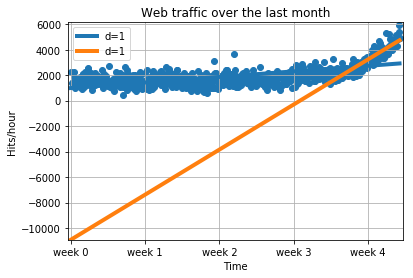

In [143]:
plt.plot(fx, f1(fx), linewidth=4)
plt.plot(fx, fb(fx), linewidth=4)
plt.legend([
    'd=%i' % f1.order,
    'd=%i' % fa.order,
    'd=%i' % fb.order,
], loc='upper left')
build_plot()
plt.show()

In [144]:
frac = 0.3
split_idx = int(frac * len(xb))
shuffled = sp.random.permutation(list(range(len(xb))))
test = sorted(shuffled[:split_idx])
train = sorted(shuffled[split_idx:])
fbt1 = sp.poly1d(sp.polyfit(xb[train], yb[train], 1))
fbt2 = sp.poly1d(sp.polyfit(xb[train], yb[train], 2))
print("fbt2(x)= \n%s" % fbt2)
print("fbt2(x)-100,000= \n%s" % (fbt2-100000))
fbt3 = sp.poly1d(sp.polyfit(xb[train], yb[train], 3))
fbt10 = sp.poly1d(sp.polyfit(xb[train], yb[train], 10))
fbt100 = sp.poly1d(sp.polyfit(xb[train], yb[train], 100))

fbt2(x)= 
         2
0.08901 x - 98.52 x + 2.907e+04
fbt2(x)-100,000= 
         2
0.08901 x - 98.52 x - 7.093e+04


/home/cybran/.virtualenvs/machine_learning/lib/python3.6/site-packages/ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()
/home/cybran/.virtualenvs/machine_learning/lib/python3.6/site-packages/numpy/lib/polynomial.py:583: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/home/cybran/.virtualenvs/machine_learning/lib/python3.6/site-packages/ipykernel_launcher.py:12: RankWarning: Polyfit may be poorly conditioned
  if sys.path[0] == '':


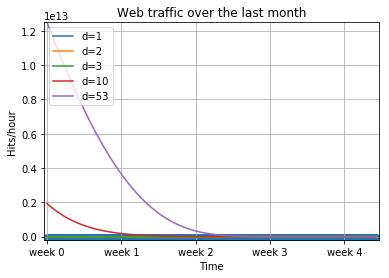

In [146]:
plt.plot(fx, fbt1(fx))
plt.plot(fx, fbt2(fx))
plt.plot(fx, fbt3(fx))

plt.plot(fx, fbt10(fx))
plt.plot(fx, fbt100(fx))

plt.legend([
    'd=%i' % fbt1.order,
    'd=%i' % fbt2.order,
    'd=%i' % fbt3.order,
    'd=%i' % fbt10.order,
    'd=%i' % fbt100.order,
], loc='upper left')
build_plot()
plt.show()